# Introduction to Computer Programming

## Week 8: Reading, writing, and plotting data

* * *

<img src="img/full-colour-logo-UoB.png" alt="Bristol" style="width: 300px;"/>

# Syntax test

* Friday 17/11/23 at 15:00
* 90 minutes to complete the test, starting at 15:00
    * Students with AEAs will automatically have their time extended
* The test can be found on Blackboard
* It covers all material up to and including Week 7 (functions)
* This is an individual test and you should not be working with others

* Since the test is online, you can take the test anywhere
* Rooms are available from **15:00-17:00** if you want to take the test on campus
    * MVB 1.15 and 1.11/1.11a
    * TA support only for finding and opening the test
* If you cannot take the test or have issues during the test
    * **Do not** email Hemma or Matt or any of the TAs
    * Email semt-student-enquiries@bristol.ac.uk
* See the Blackboard welcome page for full details of the test and who to contact

# Recap

* Use the `with` keyword with the `open` function to open a file for reading/writing
* CSV (comma-separated values) files are used to store data
* The `csv` package makes it easier to read and write .csv files
* The `matplotlib` package provides a suite of functions for plotting

# Follow-along exercise

* In this session we will:
    * import some data into Python
    * post-process and manipulate the data
    * plot the data
    * customise the plot
* There will be time for you to work on each part with support

# The problem

* During the Covid-19 pandemic, a city recorded the number of infected individuals for one year
* We would like to know whether the number of infected individuals follows a logistic trend

# Logistic growth

* The logistic model of population growth says that the fraction of the total population that is infected is given by
$$
f(t) = \frac{f_0 f_\infty}{f_0 + (f_\infty - f_0)e^{-rt}}
$$
* The variables are:
    * $t$ is time after the outbreak
    * $r$ is the infection rate
    * $f$ is the fraction of the population that has been infected
    * $f_0$ is the fraction of individuals who are initially infected 
    * $f_\infty$ is the final fraction of individuals who become infected

# Downloading the data

* The data is contained in the file `infections.zip` on Blackboard
* Download the file and unzip it in your Python working directory
    * Your Python working directory is the folder where your main Python (.py) file is
* Call your main python file `lecture8.py`

# Importing packages

* We will use the `csv` package to help with importing the data, which has been saved as .csv files
* We will also use the `matplotlib.pyplot` package to plot the data
* You will also need to import the `exp` function from the `math` package
* Import these packages by adding the relevant code to the top of your Python file

In [2]:
import csv
import matplotlib.pyplot as plt
from math import exp

# Importing the data

* Use the `with` keyword and the `csv` package to load the data
* Create two lists
    * One list should contain time data as numerical data
    * The second list should contain population data as numerical data

In [3]:
# load infection data
with open('sample_data/infection_data.csv') as file:
    reader = csv.reader(file)
    infection_data = list(reader)
    
# create lists
time = [int(e[0]) for e in infection_data[1:]]
infected = [ int(e[1]) for e in infection_data[1:]]

In [4]:
# load the city data
with open('sample_data/city_info.csv') as file:
    reader = csv.reader(file)
    city_data = list(reader)
    
# create dict out of data
city_info = {}
for e in city_data:
    city_info[e[0]] = float(e[1])
print(city_info)

{'Total population': 250000.0, 'Initial number of infected individuals': 5000.0, 'Final number of infected individuals': 212500.0, 'Infection rate': 0.025}


# Post-processing the data

* Normalise the population data by dividing it by the total population (which is contained in `city_info.csv`)
    * This will provide data for $f$

In [19]:
# normalise data
f_data = [e / city_info["Total population"] for e in infected]

# Visualising the data

* Now we will
    * Plot the data as symbols and the curve as a line on the same axes (using parameter values in `city_info.csv`)
    * Add labels to the horizonal and vertical axes
    * Add a legend

In [14]:
# extract parameters
N = city_info["Total population"]
f_0 = city_info["Initial number of infected individuals"] / N
f_inf = city_info["Final number of infected individuals"] / N
r = city_info["Infection rate"]

# define function for logistic curve
def logistic(t, r, f_0, f_inf):
    return f_0 * f_inf / (f_0 + (f_inf - f_0) * exp(-r * t))

In [16]:
# compute the logistic curve
f_log = [logistic(t, r, f_0, f_inf) for t in time]

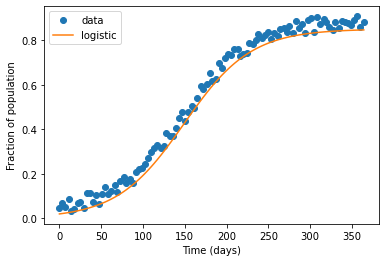

In [26]:
# plot
plt.figure()
plt.plot(time,  f_data, 'o', label = "data")
plt.plot(time, f_log, label = "logistic")
plt.xlabel('Time (days)')
plt.ylabel('Fraction of population')
plt.legend()
plt.show()

# Figure customisation

* Customise your figure by editing the marker size, colours, line width, etc
* You might also want to look up how to edit the font sizes, use LaTeX fonts, edit the tick labels
    * See https://matplotlib.org/stable/
* When you have finished customising your figure, save it as a .png file and upload it to Blackboard
    * Discussion >> Lecture 8 figure gallery >> Figure upload point >> Reply
* Use this gallery for inspiration when making your next figure!

# MH's Final figure

In [43]:
# Change the default font size to 16
plt.rcParams.update({'font.size': 16})

# Use LaTeX fonts
plt.rcParams['text.usetex'] = True

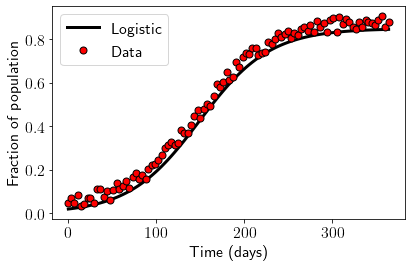

In [44]:
# plot
plt.plot(time, f_log, 'k', linewidth = 3, label = "Logistic")
plt.plot(time,  f_data, 'o', label = "Data", markerfacecolor = 'r', markeredgecolor = 'k',  markersize = 7)
plt.xlabel('Time (days)')
plt.ylabel('Fraction of population')
plt.legend()
plt.tight_layout()
plt.savefig('mh_lecture8_fig.svg')
plt.show()